<a href="https://colab.research.google.com/github/mathewdavid/maths_data_science/blob/main/Global_Pandemic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
pandemic_df = pd.read_csv('pandemic_details_of_world.csv')

In [3]:
pandemic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           272 non-null    int64 
 1   Epidemics/pandemics  272 non-null    object
 2   Disease              272 non-null    object
 3   Death toll           272 non-null    object
 4   Date                 272 non-null    object
 5   Location             272 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.9+ KB


In [4]:
#Check for missing values

pandemic_df.isnull().sum()

Unnamed: 0             0
Epidemics/pandemics    0
Disease                0
Death toll             0
Date                   0
Location               0
dtype: int64

In [5]:
#Checking for duplicates

pandemic_df.duplicated().sum()

0

In [6]:
#Checking for consistency in the data

pandemic_df["Location"].value_counts()

Worldwide                                                                            27
India                                                                                11
Spain                                                                                 6
Mexico                                                                                6
Italy                                                                                 5
                                                                                     ..
Native populations in what is now the Pacific Northwest of the United States          1
Pueblo Indians in northern New Spain (what is now the Southwestern United States)     1
Philadelphia, United States                                                           1
Ottoman Empire, Egypt                                                                 1
Asia-Pacific, Latin America                                                           1
Name: Location, Length: 167, dty

In [7]:
#Convert the "Death toll" column to a numerical data type

pandemic_df["Death toll"] = pandemic_df["Death toll"].str.replace(",", "").str.extract(r"(\d+\.\d+|\d+)").astype(float)

In [8]:
# Replace the en dash with a hyphen in the "Date" column
pandemic_df["Date"] = pandemic_df["Date"].apply(lambda x: re.sub(r"\u2013", "-", x))

In [9]:
# Convert the "Date" column to a datetime data type
pandemic_df["Date"] = pd.to_datetime(pandemic_df["Date"], errors="coerce")

In [10]:
# Split the "Location" column into separate columns for "Country" and "Region" (if applicable)
pandemic_df[["Country", "Region"]] = pandemic_df["Location"].str.extract(r"(.+?),\s*(.+)?")

In [11]:
# Drop the original "Location" column
pandemic_df.drop("Location", axis=1, inplace=True)

In [12]:
# Check the cleaned data
print(pandemic_df.head())

   Unnamed: 0  Epidemics/pandemics           Disease  Death toll Date  \
0           0          Black Death    Bubonic plague        75.0  NaT   
1           1          Spanish flu  Influenza A/H1N1        17.0  NaT   
2           2  Plague of Justinian    Bubonic plague        15.0  NaT   
3           3    HIV/AIDS epidemic          HIV/AIDS        40.1  NaT   
4           4    COVID-19 pandemic          COVID-19         7.0  NaT   

        Country                   Region  
0        Europe   Asia, and North Africa  
1           NaN                      NaN  
2  North Africa  Europe and Western Asia  
3           NaN                      NaN  
4           NaN                      NaN  


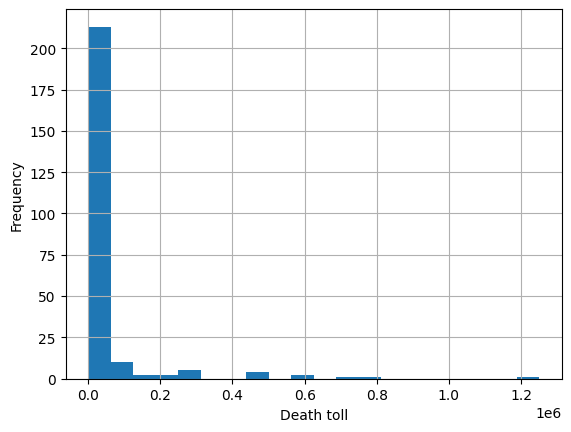

In [13]:
#Check the distribution of the "Death toll" variable
pandemic_df["Death toll"].hist(bins=20)
plt.xlabel("Death toll")
plt.ylabel("Frequency")
plt.show()

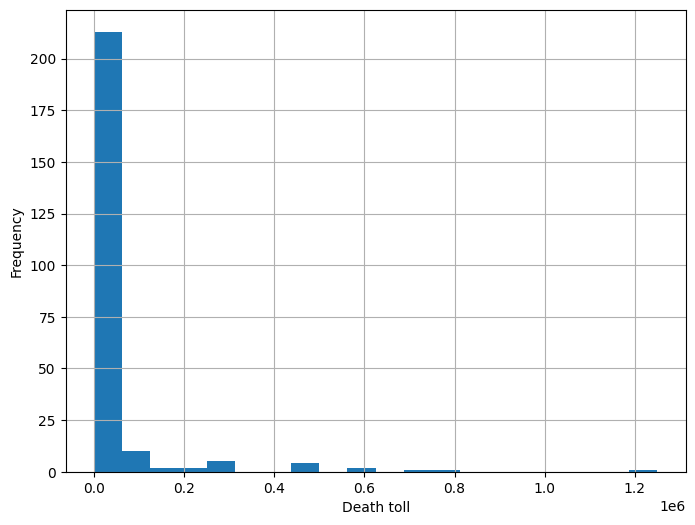

In [14]:
# Check the distribution of the "Death toll" variable
fig, ax = plt.subplots(figsize=(8, 6))
pandemic_df["Death toll"].hist(bins=20, ax=ax)
ax.set_xlabel("Death toll")
ax.set_ylabel("Frequency")
plt.show()

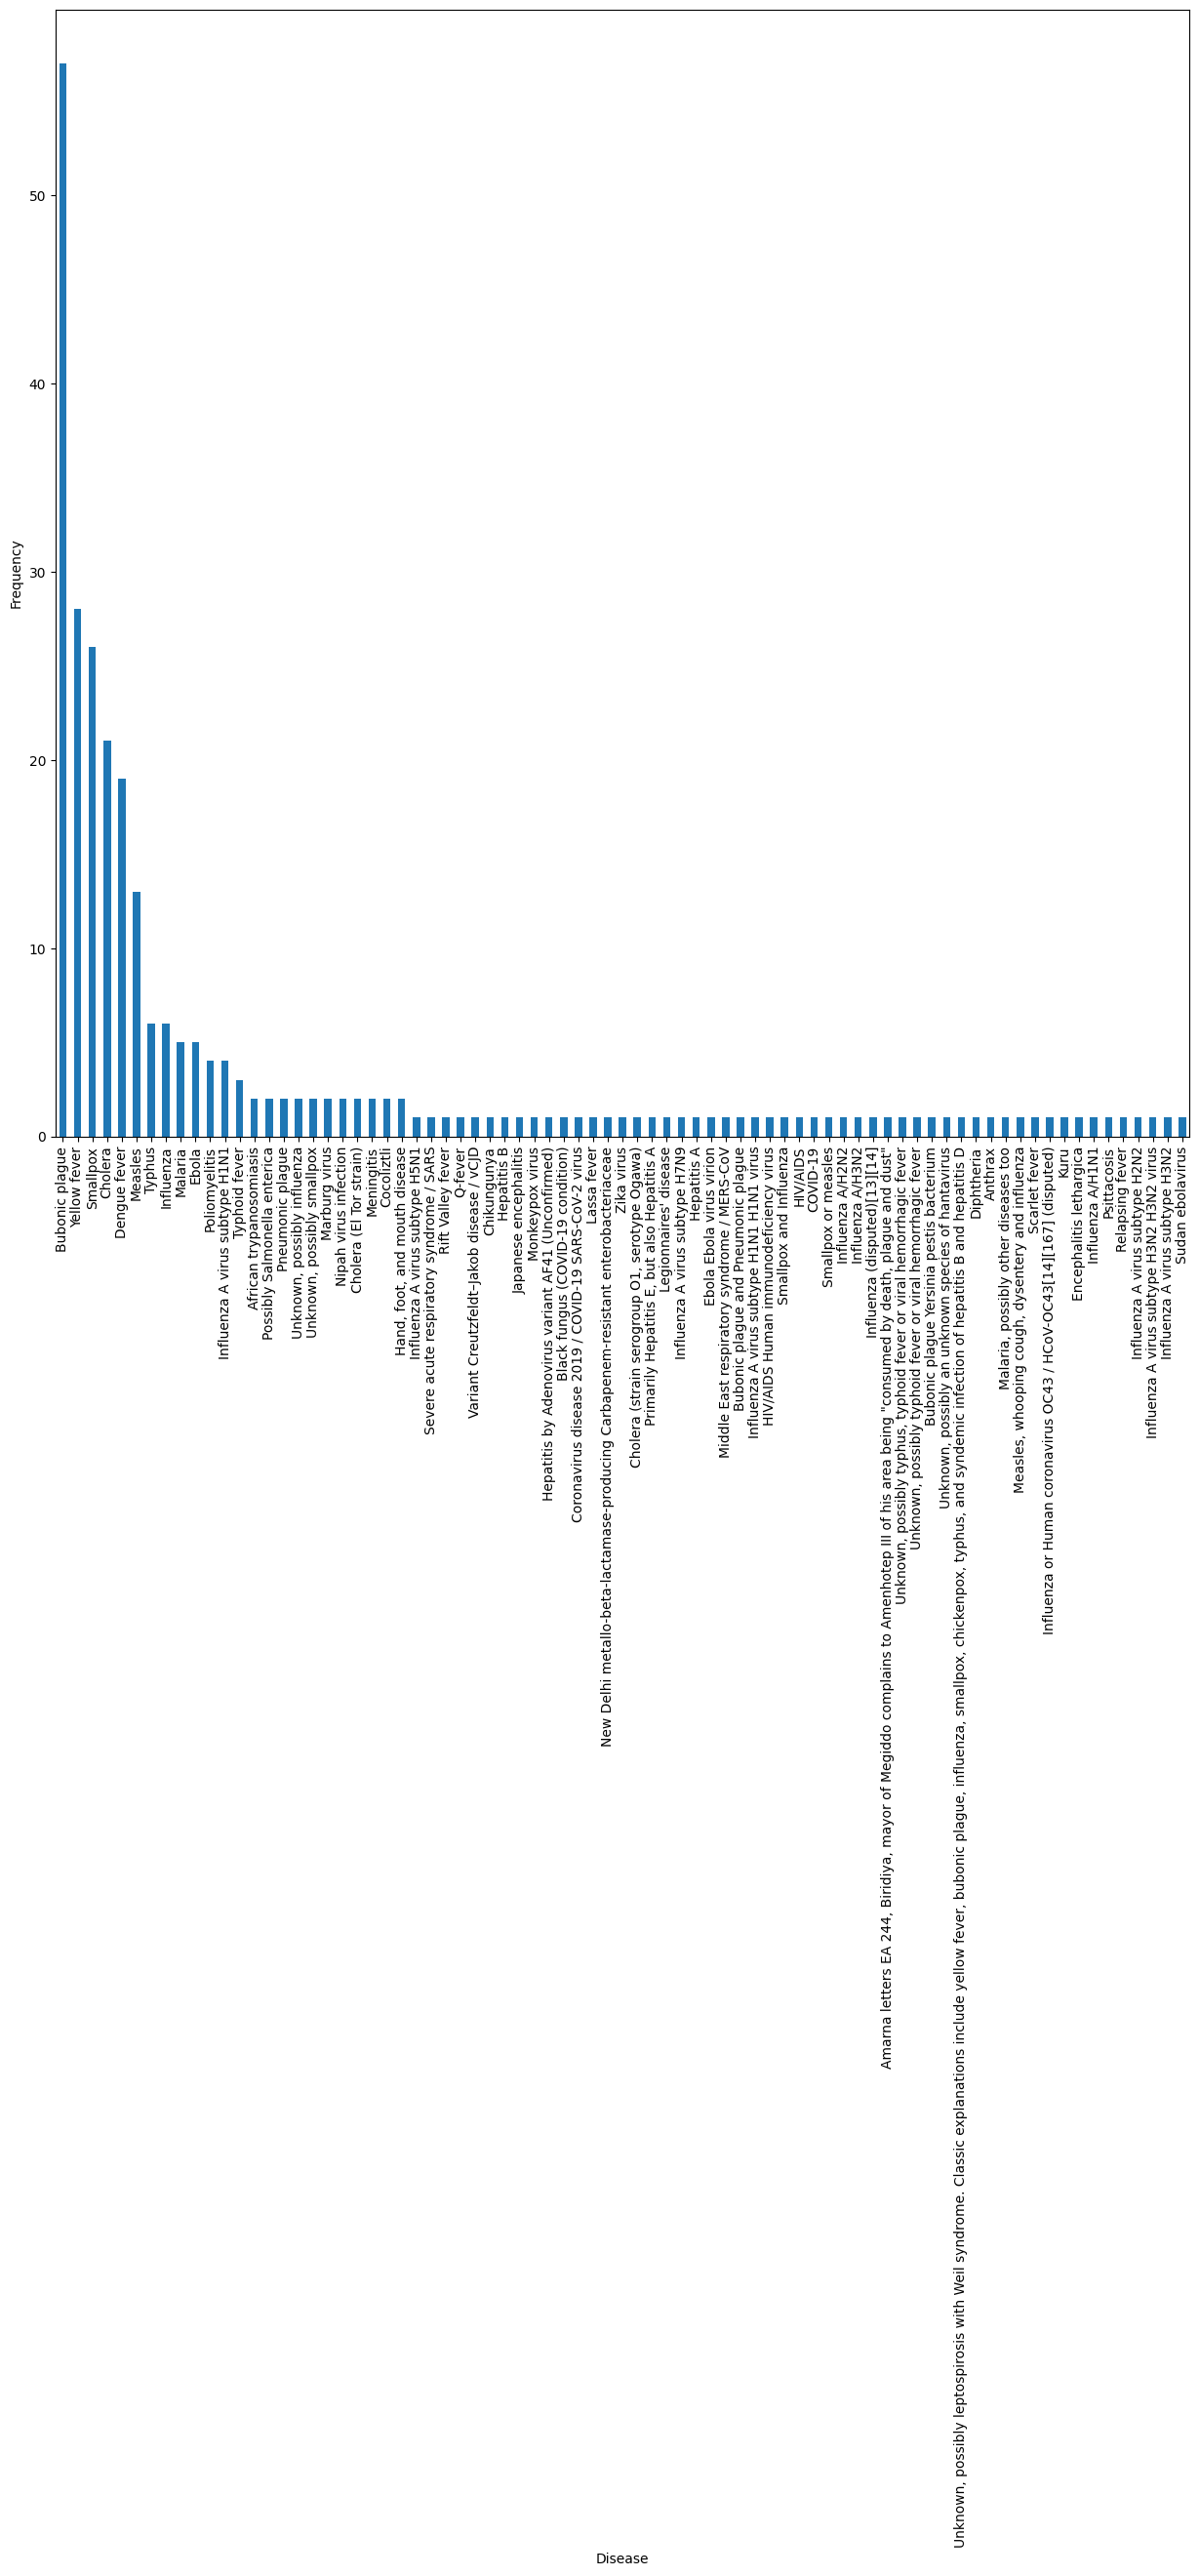

In [15]:
# Examine the distribution of the "Disease" variable
fig, ax = plt.subplots(figsize=(15, 15))
pandemic_df["Disease"].value_counts().plot(kind="bar", ax=ax)
ax.set_xlabel("Disease")
ax.set_ylabel("Frequency")
plt.show()

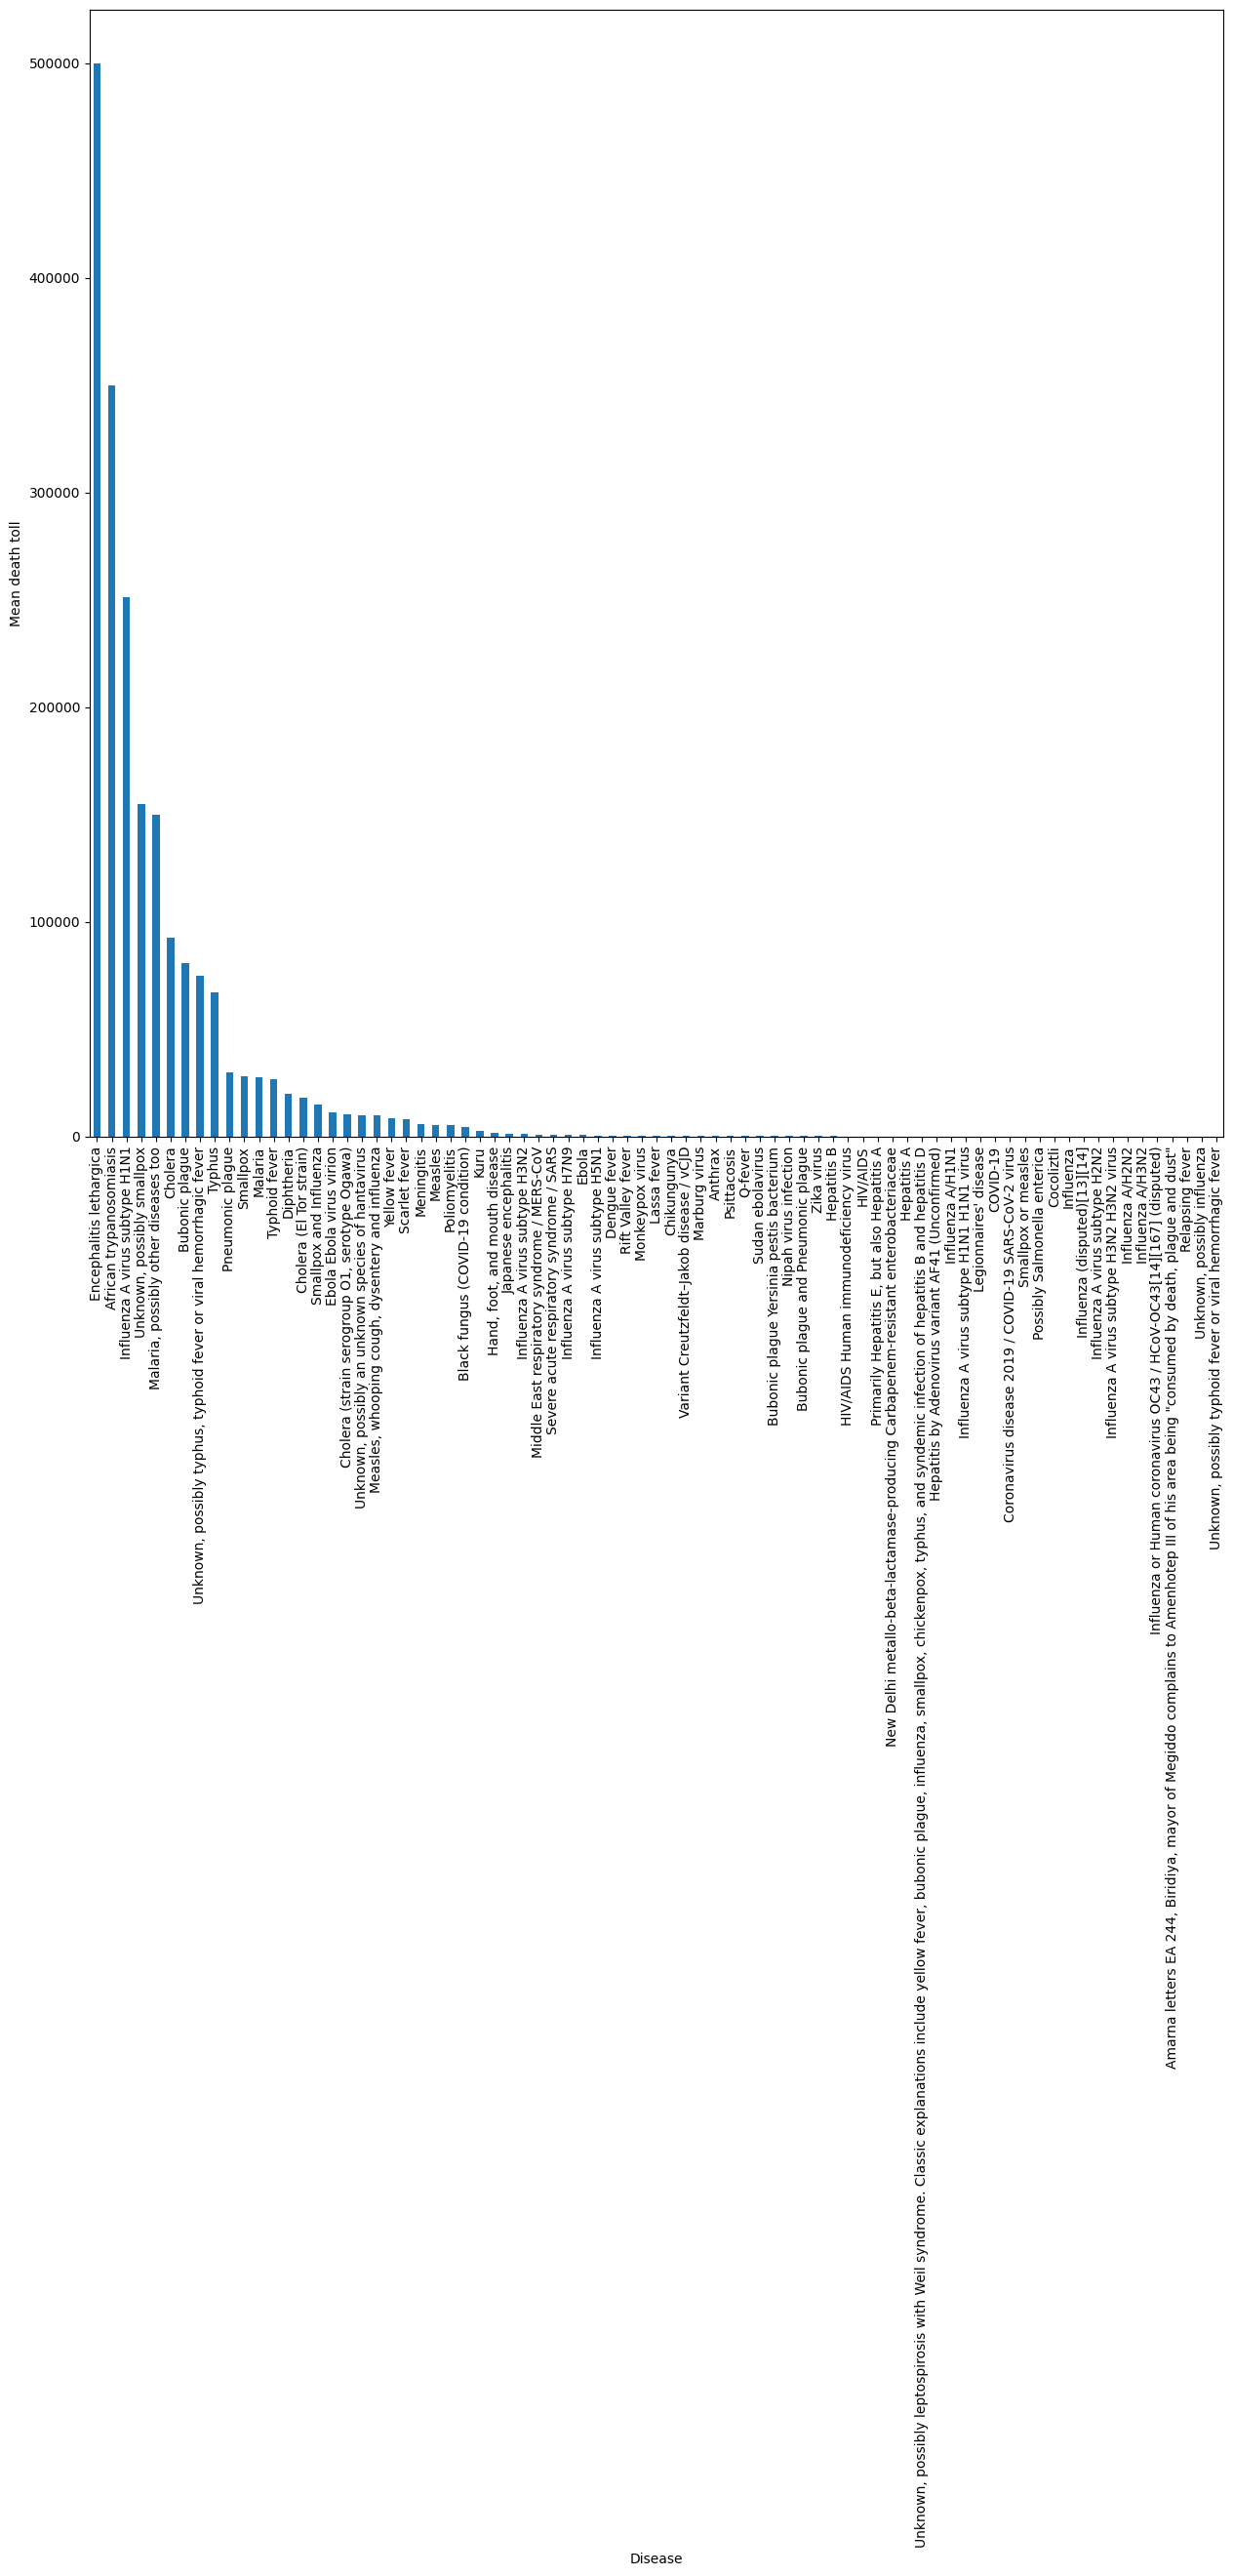

In [16]:
# Analyze the death toll by disease
fig, ax = plt.subplots(figsize=(15, 15))
pandemic_df.groupby("Disease")["Death toll"].mean().sort_values(ascending=False).plot(kind="bar", ax=ax)
ax.set_xlabel("Disease")
ax.set_ylabel("Mean death toll")
plt.show()

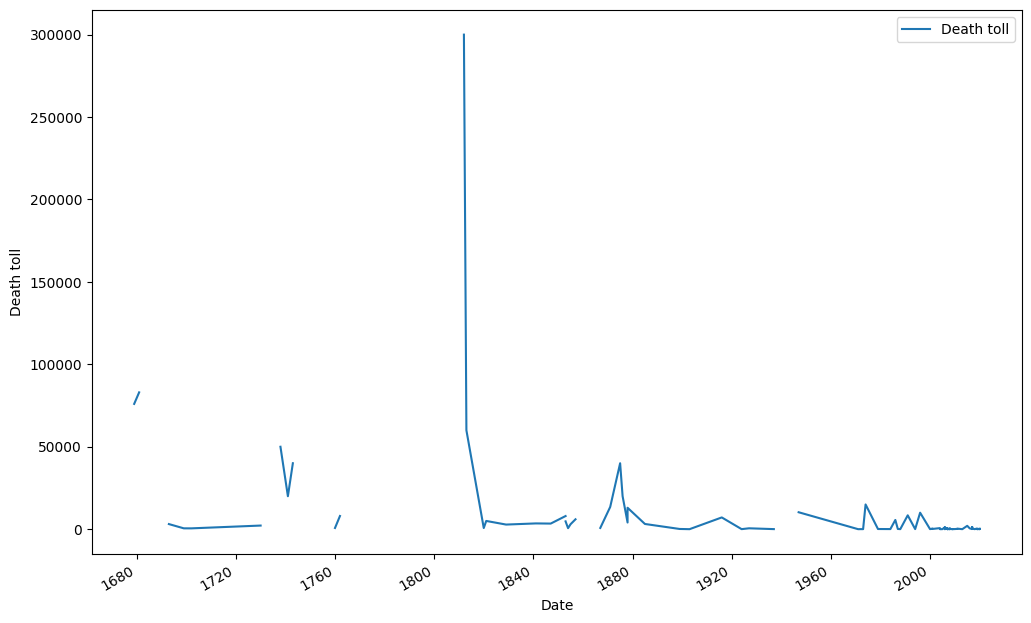

In [17]:
# Examine the relationship between the "Death toll" and "Date" variables
fig, ax = plt.subplots(figsize=(12, 8))
pandemic_df.plot(x="Date", y="Death toll", ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Death toll")
plt.show()

In [18]:
# Create a pivot table to examine the death toll by country and disease
pivot_df = pandemic_df.pivot_table(values="Death toll", index="Country", columns="Disease")

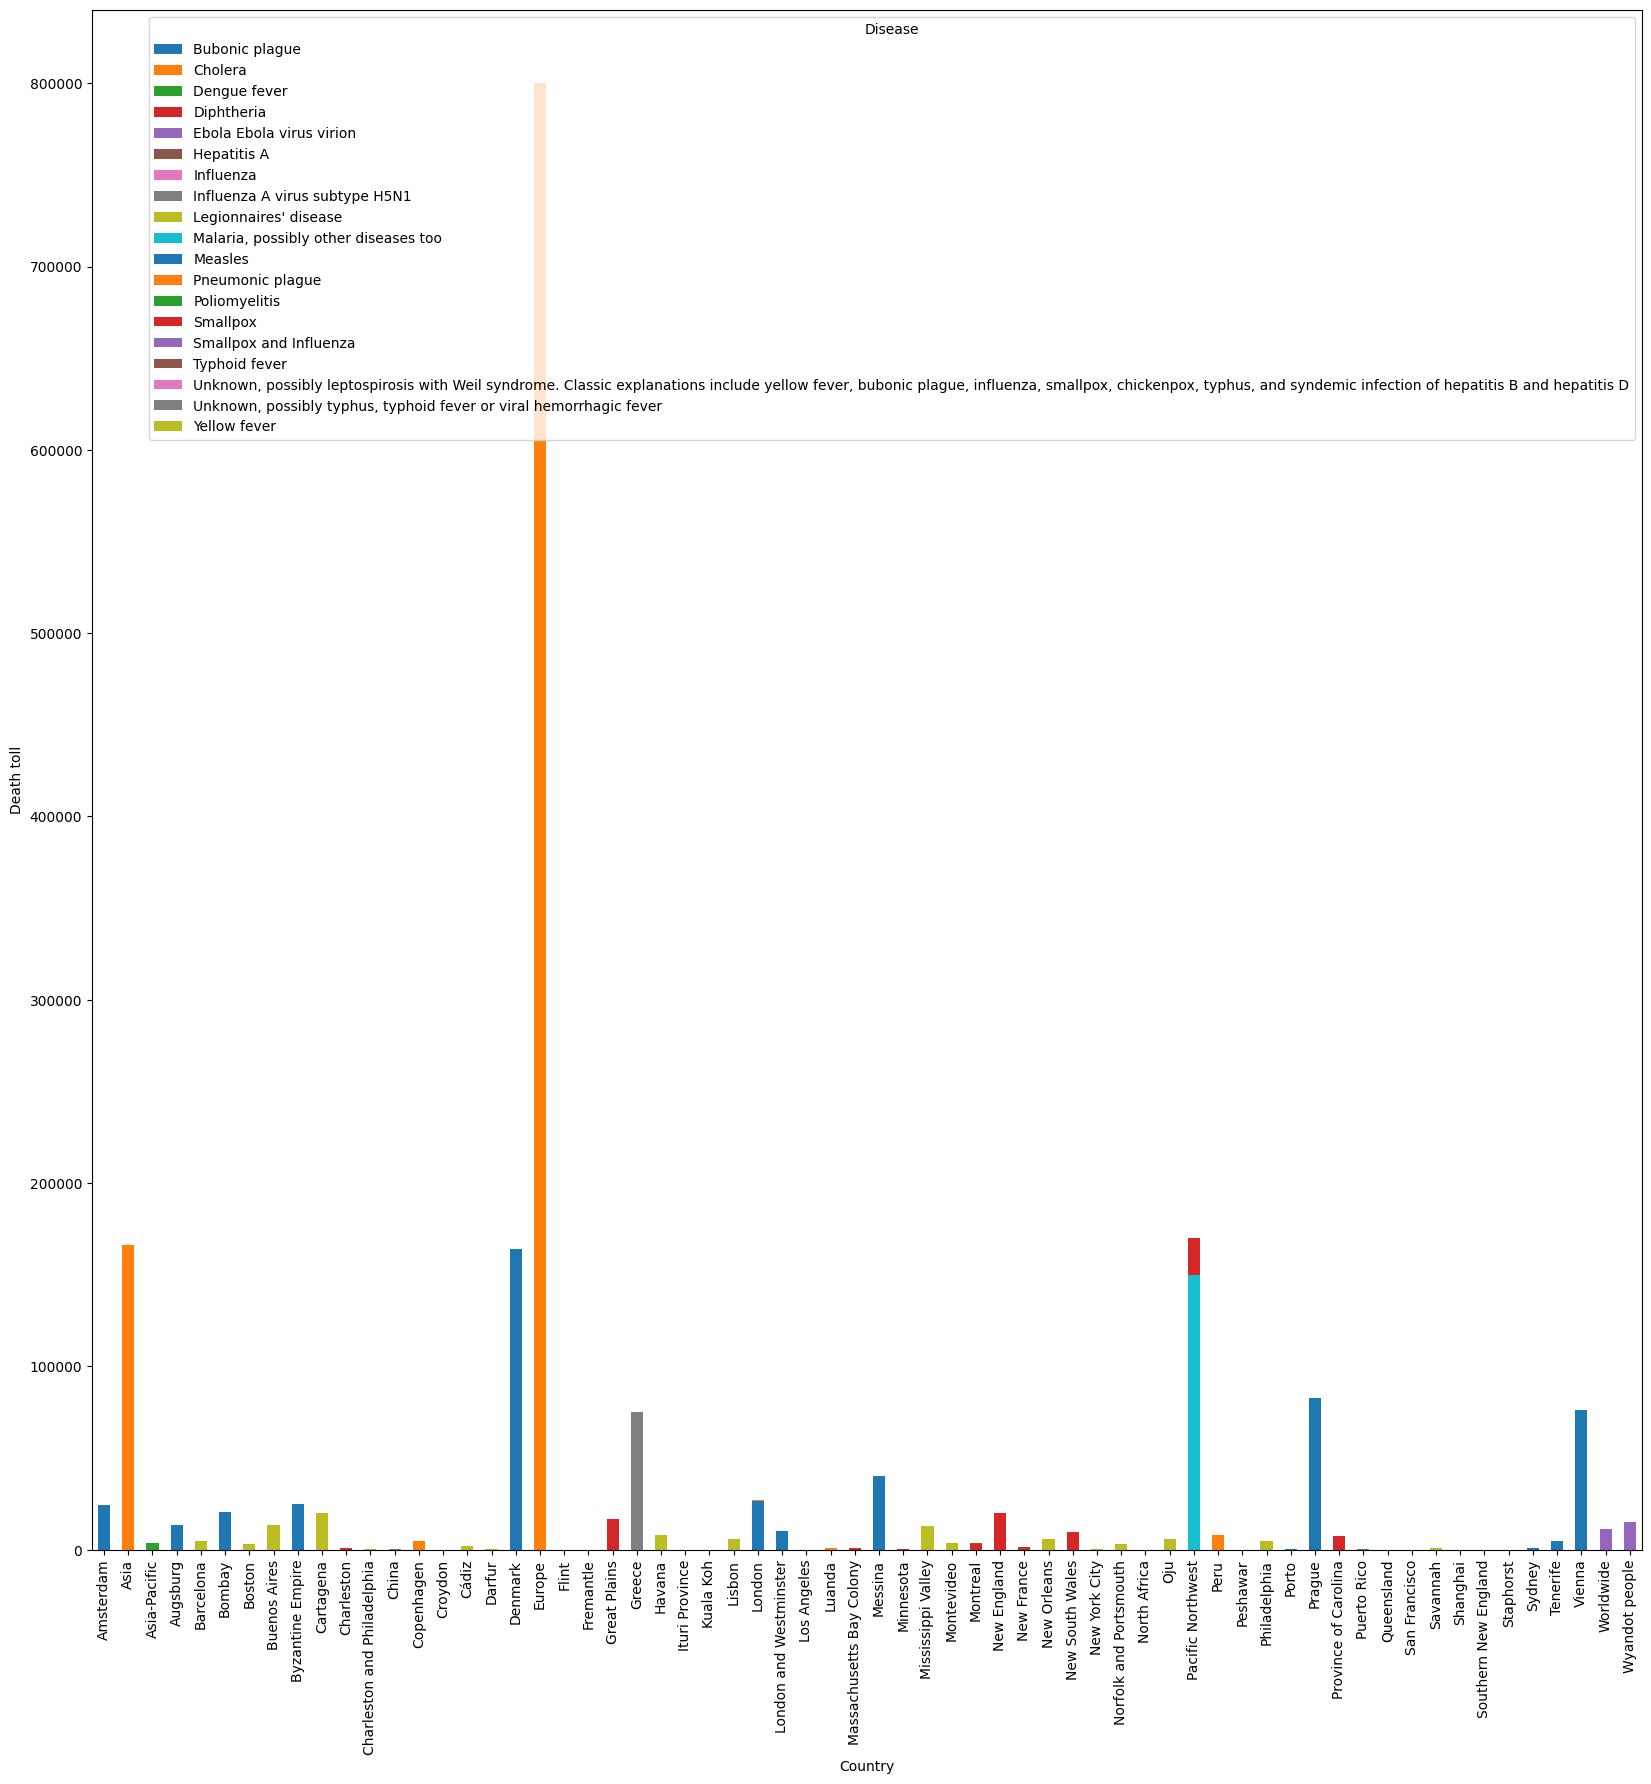

In [19]:
# Create a pivot table to examine the death toll by country and disease
fig, ax = plt.subplots(figsize=(20, 20))
pandemic_df.pivot_table(values="Death toll", index="Country", columns="Disease").plot(kind="bar", stacked=True, ax=ax)
ax.set_xlabel("Country")
ax.set_ylabel("Death toll")
plt.show()

In [20]:
#Summary statistics for the "Death toll" variable
pandemic_df["Death toll"].describe()

count    2.410000e+02
mean     4.257106e+04
std      1.393683e+05
min      1.000000e+00
25%      4.010000e+01
50%      7.300000e+02
75%      1.350000e+04
max      1.250000e+06
Name: Death toll, dtype: float64

In [21]:
#Summary statistics for the "Date" variable
pandemic_df["Date"].describe()

<ipython-input-21-a56a75fe8f04>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pandemic_df["Date"].describe()


count                     106
unique                     76
top       2006-01-01 00:00:00
freq                        6
first     1679-01-01 00:00:00
last      2020-01-01 00:00:00
Name: Date, dtype: object

In [22]:
#The top 5 most deadly pandemics or epidemics
pandemic_df.sort_values("Death toll", ascending=False).head(5)[["Epidemics/pandemics", "Disease", "Death toll"]]

,Epidemics/pandemics,Disease,Death toll
59,Naples Plague (part of the second plague pande...,Bubonic plague,1250000.0
151,Sixth cholera pandemic,Cholera,800000.0
183,1977 Russian flu,Influenza A virus subtype H1N1,700000.0
47,1596–1602 Spain plague epidemic (part of the s...,Bubonic plague,600000.0
135,Fourth cholera pandemic,Cholera,600000.0


In [23]:
#The mean death toll by disease
pandemic_df.groupby("Disease")["Death toll"].mean().sort_values(ascending=False)

Disease
Encephalitis lethargica                                                                                                                500000.0
African trypanosomiasis                                                                                                                350000.0
Influenza A virus subtype H1N1                                                                                                         251121.0
Unknown, possibly smallpox                                                                                                             155002.5
Malaria, possibly other diseases too                                                                                                   150000.0
                                                                                                                                         ...   
Influenza or Human coronavirus OC43 / HCoV-OC43[14][167] (disputed)                                                             

In [24]:
#The median death toll by continent
pandemic_df.groupby(pandemic_df["Country"].str.split().str[-1])["Death toll"].median().sort_values(ascending=False)

Country
Europe       400037.5
Denmark      164000.0
Asia         100000.0
Northwest     85000.0
Prague        83000.0
               ...   
America           NaN
Megiddo           NaN
Rome              NaN
Victoria          NaN
nation            NaN
Name: Death toll, Length: 67, dtype: float64

In [25]:
# Group the data by year and sum the death tolls for each year
yearly_deaths = pandemic_df.groupby(pandemic_df["Date"].dt.year)["Death toll"].sum()

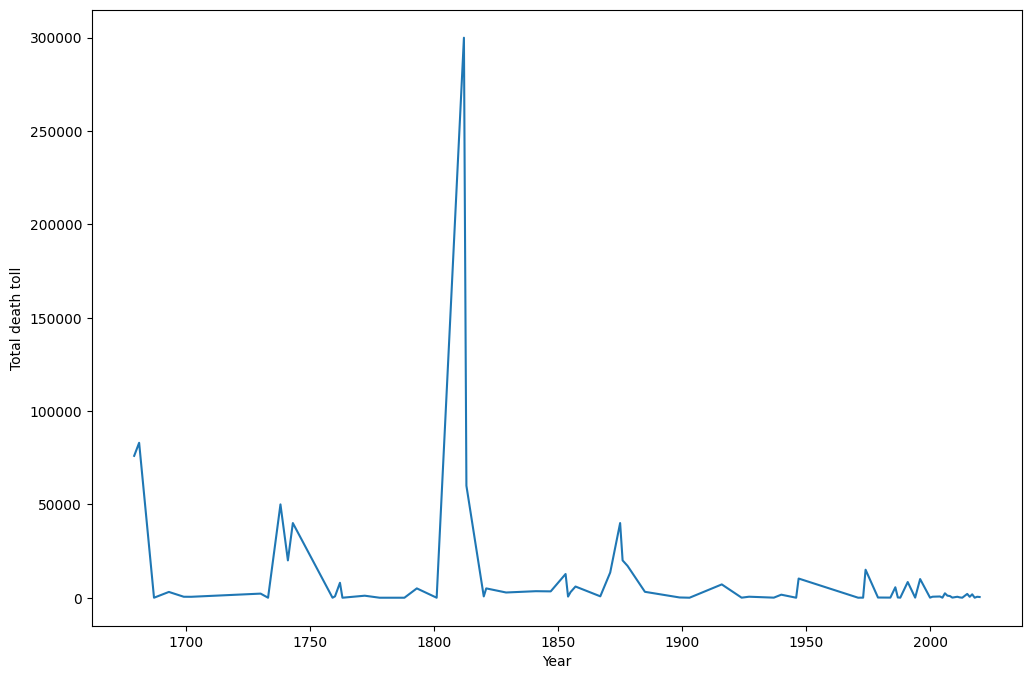

In [26]:
# Plot the total death toll over time
fig, ax = plt.subplots(figsize=(12, 8))
yearly_deaths.plot(ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Total death toll")
plt.show()

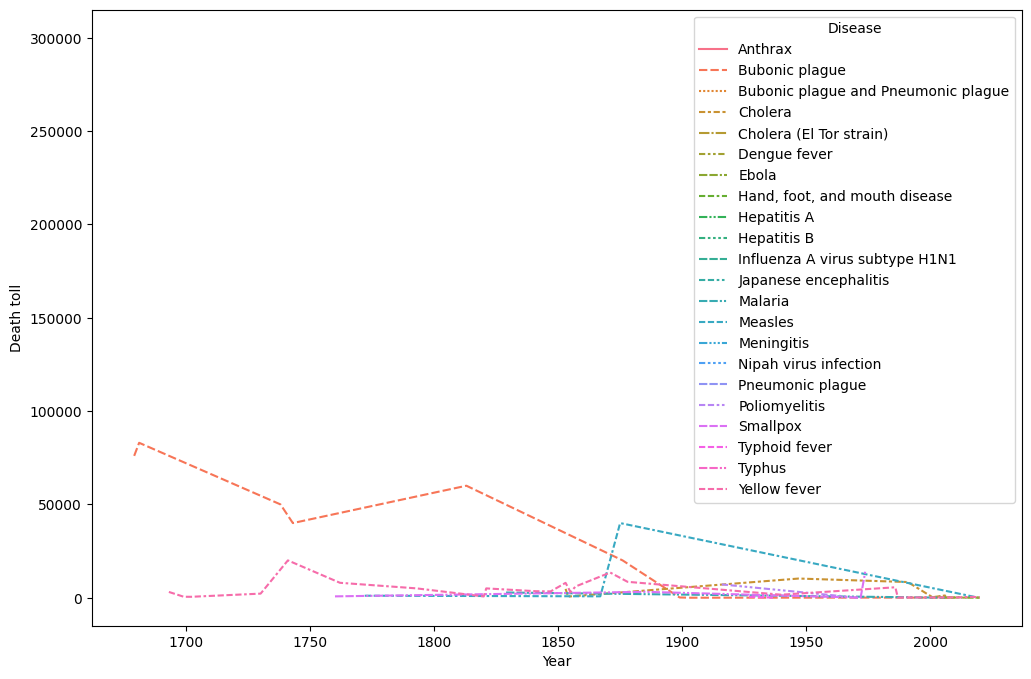

In [27]:
# Pivot the data to create a table of death tolls by disease and year
pivot_df = pandemic_df.pivot_table(values="Death toll", index=pandemic_df["Date"].dt.year, columns="Disease")

# Plot the death toll by disease over time
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=pivot_df, ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Death toll")
plt.show()

In [28]:
# Pivot the data to create a table of death tolls by disease and year
pivot_df = pandemic_df.pivot_table(values="Death toll", index=pandemic_df["Date"].dt.year, columns="Disease")

In [29]:
# Calculate the correlation between the death tolls of different diseases
corr_df = pivot_df.corr()

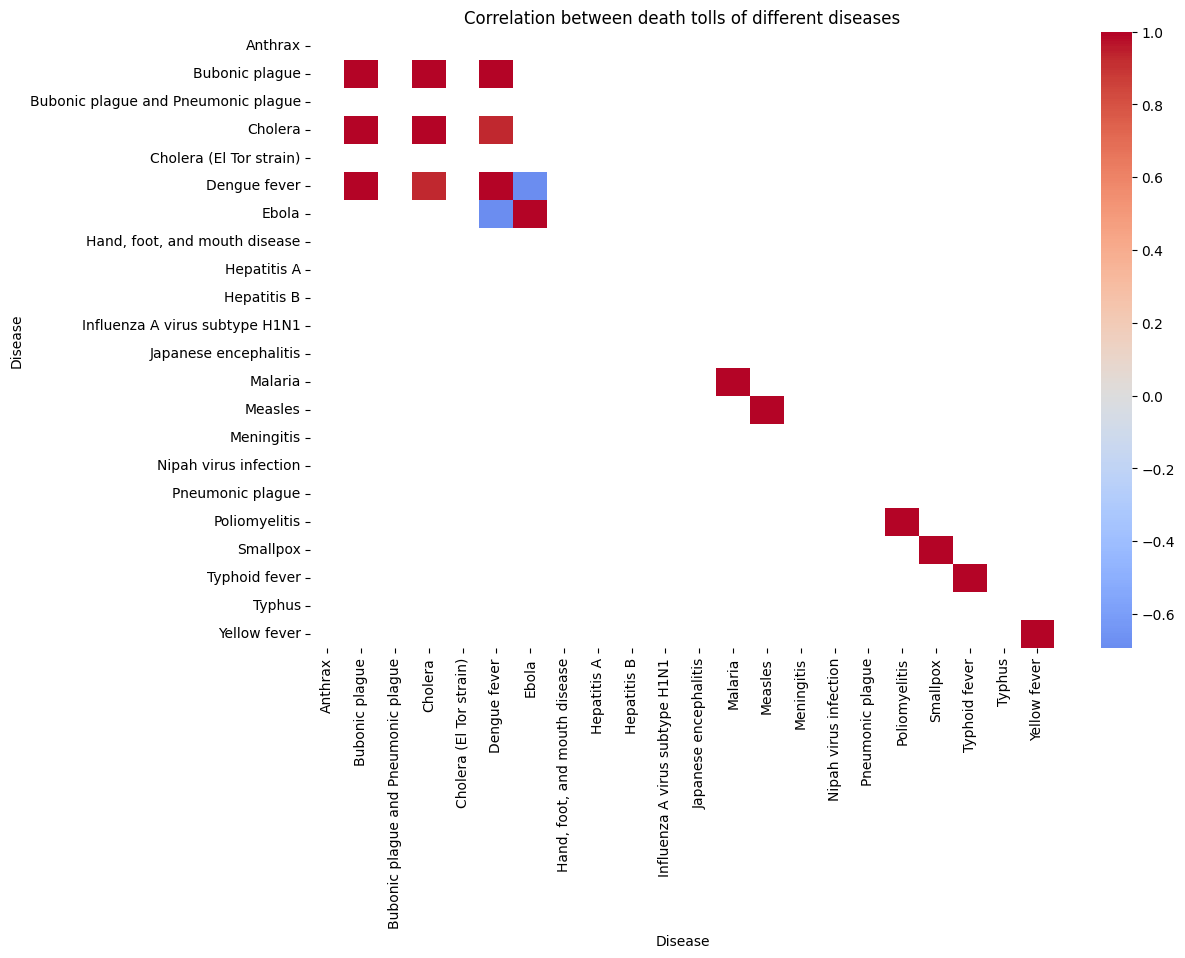

In [30]:
# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_df, cmap="coolwarm", center=0, ax=ax)
ax.set_title("Correlation between death tolls of different diseases")
plt.show()

In [31]:
# Group the data by country and sum the death tolls for each country
country_deaths = pandemic_df.groupby("Country")["Death toll"].sum().reset_index()

# Plot the total death toll by country on a map
fig = px.choropleth(country_deaths, locations="Country", locationmode="country names", color="Death toll",
                    hover_name="Country", title="Total death toll by country")
fig.show()

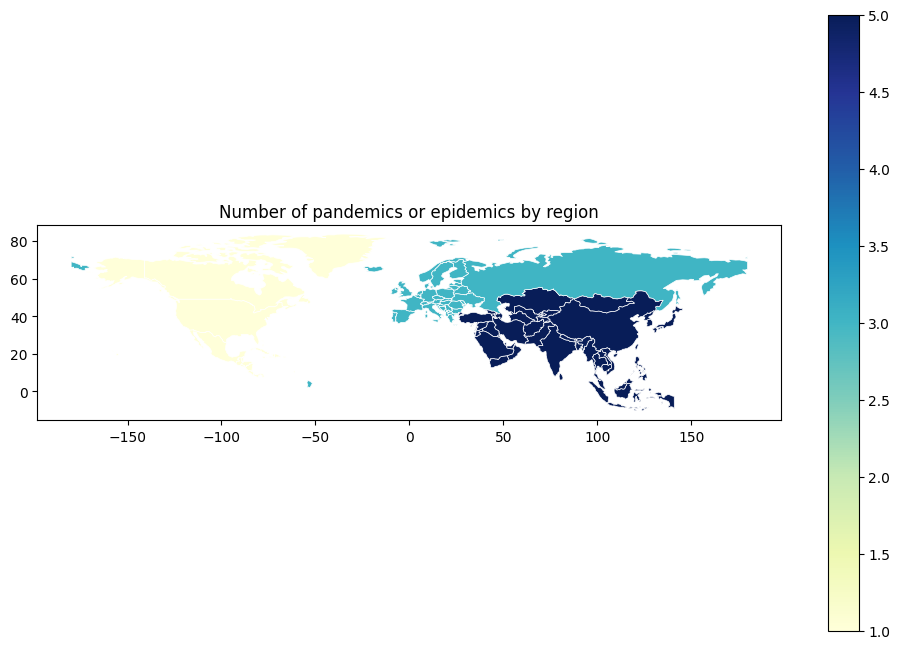

In [37]:
# Load a world map shapefile
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Group the Pandemic DataFrame by region and count the number of pandemics or epidemics in each region
region_counts = pandemic_df.groupby("Country")["Epidemics/pandemics"].count().reset_index()

# Merge the region counts with the world map data
merged_df = world.merge(region_counts, how="left", left_on="continent", right_on="Country")

# Create a choropleth map of the number of pandemics or epidemics by region
fig, ax = plt.subplots(figsize=(12, 8))
merged_df.plot(column="Epidemics/pandemics", cmap="YlGnBu", linewidth=0.5, edgecolor="white", legend=True, ax=ax)
ax.set_title("Number of pandemics or epidemics by region")
plt.show()